In [86]:
import pandas as pd
from pandas import datetime
import numpy as np
import stockstats as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.autograd import Variable

C:\Users\Mahdis\Anaconda3\envs\Deep_Learning_Class\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [3]:
df = pd.read_csv("Price.csv")
df

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [6]:
stock_df = df[df.symbol == 'YHOO']
print(stock_df)

              date symbol       open      close        low       high  \
713     2010-01-04   YHOO  16.940001  17.100000  16.879999  17.200001   
1181    2010-01-05   YHOO  17.219999  17.230000  17.000000  17.230000   
1649    2010-01-06   YHOO  17.170000  17.170000  17.070000  17.299999   
2117    2010-01-07   YHOO  16.809999  16.700001  16.570000  16.900000   
2585    2010-01-08   YHOO  16.680000  16.700001  16.620001  16.760000   
...            ...    ...        ...        ...        ...        ...   
849257  2016-12-23   YHOO  38.459999  38.660000  38.369999  38.810001   
849757  2016-12-27   YHOO  38.590000  38.919998  38.500000  39.070000   
850257  2016-12-28   YHOO  39.119999  38.730000  38.709999  39.220001   
850757  2016-12-29   YHOO  38.759998  38.639999  38.480000  38.930000   
851257  2016-12-30   YHOO  38.720001  38.669998  38.430000  39.000000   

            volume  
713     16587400.0  
1181    11718100.0  
1649    16422000.0  
2117    31816300.0  
2585    15470000.0

In [46]:
stock = st.StockDataFrame.retype(stock_df)

In [47]:
stock

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
...,...,...,...,...,...,...
2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0
2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0


In [67]:
stock.get("macd").dtype

dtype('float64')

In [70]:
macd = np.array(stock.get("macd"))
macd

array([ 0.        ,  0.00291667,  0.00185582, ..., -0.63138655,
       -0.63351658, -0.62557276])

In [78]:
stock.get("macd")[1]

0.0029166666666711194

In [74]:
new_df = pd.concat([
    stock_df,
    pd.DataFrame(stock.get("macd"), dtype=('float64'))
], ignore_index=True)
new_df

,symbol,open,close,low,high,volume,close_12_ema,close_26_ema,macd,macd_9_ema,macds,macdh
0,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0,17.100000,17.100000,0.000000,0.000000,0.000000,0.000000
1,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0,17.170417,17.167500,0.002917,0.001620,0.001620,0.001296
2,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0,17.170254,17.168398,0.001856,0.001717,0.001717,0.000139
3,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0,17.021814,17.037455,-0.015641,-0.004163,-0.004163,-0.011478
4,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0,16.934378,16.959198,-0.024820,-0.010308,-0.010308,-0.014512
...,...,...,...,...,...,...,...,...,...,...,...,...
3519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.635353,NaN,NaN,NaN
3520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.628648,NaN,NaN,NaN
3521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.631387,NaN,NaN,NaN
3522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.633517,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

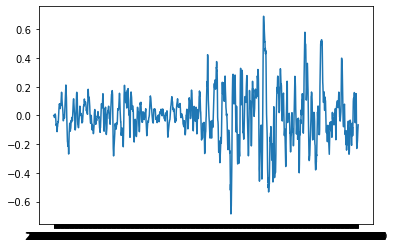

In [64]:
stock['macdh']
plt.figure()
plt.plot(stock['macdh'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

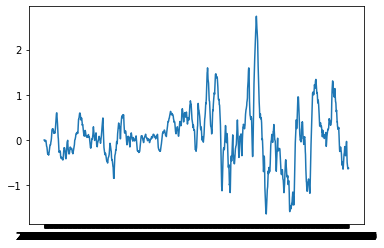

In [63]:
stock.get("macd")
plt.figure()
plt.plot(stock['macd'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

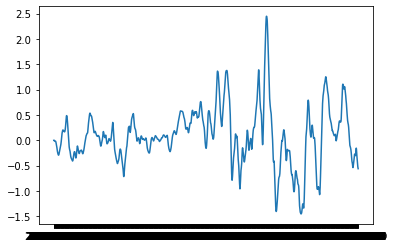

In [59]:
stock['macds']
plt.figure()
plt.plot(stock['macds'])
plt.show


In [55]:
stock['rsi_6']

date
2010-01-04           NaN
2010-01-05    100.000000
2010-01-06     64.356436
2010-01-07     14.792924
2010-01-08     14.792924
                 ...    
2016-12-23     35.547269
2016-12-27     41.805754
2016-12-28     38.525298
2016-12-29     36.880276
2016-12-30     37.940205
Name: rsi_6, Length: 1762, dtype: float64

In [51]:
stock['rsi_12']

date
2010-01-04           NaN
2010-01-05    100.000000
2010-01-06     66.511628
2010-01-07     17.223283
2010-01-08     17.223283
                 ...    
2016-12-23     38.222478
2016-12-27     41.012764
2016-12-28     39.587346
2016-12-29     38.888896
2016-12-30     39.278452
Name: rsi_12, Length: 1762, dtype: float64

In [79]:
cols = list(new_df)[2:10]

In [80]:
df_training = stock_df[cols].astype(float)
print(df_training)

                close        low       high      volume  close_12_ema  \
date                                                                    
2010-01-04  17.100000  16.879999  17.200001  16587400.0     17.100000   
2010-01-05  17.230000  17.000000  17.230000  11718100.0     17.170417   
2010-01-06  17.170000  17.070000  17.299999  16422000.0     17.170254   
2010-01-07  16.700001  16.570000  16.900000  31816300.0     17.021814   
2010-01-08  16.700001  16.620001  16.760000  15470000.0     16.934378   
...               ...        ...        ...         ...           ...   
2016-12-23  38.660000  38.369999  38.810001   3840100.0     39.425909   
2016-12-27  38.919998  38.500000  39.070000   4240300.0     39.348077   
2016-12-28  38.730000  38.709999  39.220001   4393500.0     39.252988   
2016-12-29  38.639999  38.480000  38.930000   4170200.0     39.158682   
2016-12-30  38.669998  38.430000  39.000000   6431600.0     39.083500   

            close_26_ema      macd  macd_9_ema  
d

In [83]:
scaler = StandardScaler()
scaler = scaler.fit(df_training)
df_training_scaled = scaler.transform(df_training)

df_training_scaled.shape

(1762, 8)

In [84]:
#splitting
train_size = int(len(df_training_scaled)*.8)
test_size = len(df_training_scaled)-train_size
train_data = df_training_scaled[0:train_size,:]
test_data = df_training_scaled[train_size:len(df_training_scaled),:] 

In [85]:
#data for lstm
n_future = 1
n_past = 14

trainx = []
trainy = []

for i in range(n_past, len(train_data) - n_future +1):
   trainx.append(train_data[i - n_past:i, 0:train_data.shape[1]])
   trainy.append(train_data[i + n_future-1:i + n_future, 0])
  
trainX , trainY = np.array(trainx) , np.array(trainy)

testx = []
testy = []

for i in range(n_past, len(test_data) - n_future +1):
   testx.append(test_data[i - n_past:i, 0:train_data.shape[1]])
   testy.append(test_data[i + n_future-1:i + n_future, 0])
  
testX , testY = np.array(testx) , np.array(testy)

print("trainX shape == {}.".format(trainX.shape))
print("trainY shape == {}.".format(trainY.shape))
print("testX shape == {}.".format(testX.shape))
print("testY shape == {}.".format(testY.shape))


trainX shape == (1395, 14, 8).
trainY shape == (1395, 1).
testX shape == (339, 14, 8).
testY shape == (339, 1).


In [87]:
x_train = torch.from_numpy(trainX).type(torch.Tensor)
x_test = torch.from_numpy(testX).type(torch.Tensor)
y_train = torch.from_numpy(trainY).type(torch.Tensor)
y_test = torch.from_numpy(testY).type(torch.Tensor)

In [90]:
#Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [94]:
# Hyper-parameters 
input_size = 8
seq_length = 14
hidden_size = 2
num_classes = 1
batch_size = 16
learning_rate = 0.001
num_layers = 1
num_timesteps = 14

In [95]:
class MV_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MV_LSTM, self).__init__()
        self.input_size = input_size
        self.num_layers = num_layers 
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) 
        #(batch, seq, input)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_size*seq_length, 1)

    def init_hidden(self, batch_size):
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size) 
        self.hidden = (h0,c0)
   
    def forward(self, x):
        batch_size, seq_length, _ = x.size()
        lstm_out, self.hidden = self.lstm(x, self.hidden)
        x = lstm_out.contiguous().view(batch_size, -1)
        out = self.fc(x)
        return out

mv_model = MV_LSTM(input_size, hidden_size).to(device)

In [96]:
#create
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(mv_model.parameters(), lr=learning_rate)  
print(mv_model)

MV_LSTM(
  (lstm): LSTM(8, 2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=28, out_features=1, bias=True)
)


In [97]:
#Training
train_episodes = 100
hist = np.zeros(train_episodes)
mv_model.train()
for t in range(train_episodes):
    for b in range(0,len(trainX),batch_size):
        inpt = trainX[b:b+batch_size,:,:]
        target =trainY[b:b+batch_size]    
        
        x_batch = torch.tensor(inpt,dtype=torch.float32)    
        y_batch = torch.tensor(target,dtype=torch.float32)
       
    
        mv_model.init_hidden(x_batch.size(0))
    #    lstm_out, _ = mv_net.l_lstm(x_batch,nnet.hidden)    
    #    lstm_out.contiguous().view(x_batch.size(0),-1)
        output = mv_model(x_batch) 
        loss = criterion(output.view(-1), y_batch)
        hist[t] = loss.item()
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()   


    if t % 10 == 0 and t !=0:
      print('epoch : ' , t , 'loss : ' , loss.item())

C:\Users\Mahdis\Anaconda3\envs\Deep_Learning_Class\lib\site-packages\torch\nn\modules\loss.py:445: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Mahdis\Anaconda3\envs\Deep_Learning_Class\lib\site-packages\torch\nn\modules\loss.py:445: UserWarning: Using a target size (torch.Size([3, 1])) that is different to the input size (torch.Size([3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch :  10 loss :  0.05171046033501625
epoch :  20 loss :  0.044600412249565125
epoch :  30 loss :  0.028755374252796173
epoch :  40 loss :  0.018499724566936493
epoch :  50 loss :  0.013431991450488567
epoch :  60 loss :  0.010472817346453667
epoch :  70 loss :  0.008309234865009785
epoch :  80 loss :  0.006693469826132059
epoch :  90 loss :  0.0055273850448429585


<function matplotlib.pyplot.show(close=None, block=None)>

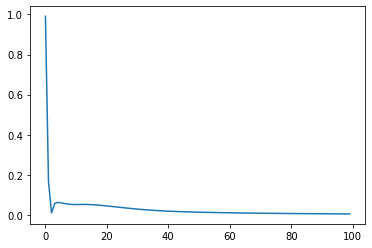

In [98]:
plt.figure()
plt.plot(hist, label="Training Loss")
plt.legend
plt.show

In [99]:
test_episodes = 100
mv_model.eval()
for t in range(test_episodes):
    for b in range(0,len(testX),batch_size):
        inpt_t = testX[b:b+batch_size,:,:]
        target_t =testY[b:b+batch_size]    
        
        x_batch_t = torch.tensor(inpt_t,dtype=torch.float32)    
        y_batch_t = torch.tensor(target_t,dtype=torch.float32)
       
    
        mv_model.init_hidden(x_batch_t.size(0))
    #    lstm_out, _ = mv_net.l_lstm(x_batch,nnet.hidden)    
    #    lstm_out.contiguous().view(x_batch.size(0),-1)
        output_t = mv_model(x_batch_t) 
        loss = criterion(output_t.view(-1), y_batch_t)
        
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()   


    if t % 10 == 0 and t !=0:
      print('epoch : ' , t , 'loss : ' , loss.item())


C:\Users\Mahdis\Anaconda3\envs\Deep_Learning_Class\lib\site-packages\torch\nn\modules\loss.py:445: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Mahdis\Anaconda3\envs\Deep_Learning_Class\lib\site-packages\torch\nn\modules\loss.py:445: UserWarning: Using a target size (torch.Size([3, 1])) that is different to the input size (torch.Size([3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch :  10 loss :  0.0004646712332032621
epoch :  20 loss :  0.000409039668738842
epoch :  30 loss :  0.00040265743155032396
epoch :  40 loss :  0.0004058975027874112
epoch :  50 loss :  0.0004115113406442106
epoch :  60 loss :  0.00041817521560005844
epoch :  70 loss :  0.00042477011447772384
epoch :  80 loss :  0.00042932573705911636
epoch :  90 loss :  0.00042919270345009863
